In [1]:
import pandas as pd

path ="../datasets/Iris.csv"
dataset = pd.read_csv(path)

In [2]:
# Remove unwanted column(s) from the data
dataset = dataset.drop('Id',axis=1)

In [3]:
# Convert target variable (Species) as category
dataset.Species = dataset.Species.astype('category')

# Placing converted values to Species column
dataset.Species = dataset.Species.cat.codes

dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# Split-out test dataset
from sklearn import model_selection

array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, 
random_state=42)

print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

X_train[:5]

120
30
120
30


array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [5]:
# Using StandardScalar function to scale all numarical variables (features)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_train[:5]

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358]])

logis regression: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


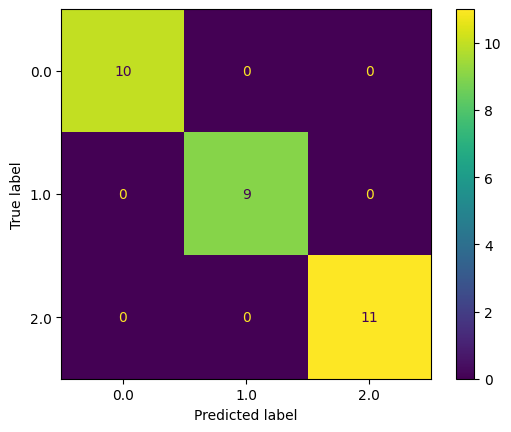

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

logis = LogisticRegression()
logis.fit(X_train,y_train)
logis_prediction=logis.predict(X_test)

cm = confusion_matrix(y_test,logis_prediction)

print(f'logis regression: \n{cm}')

ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logis.classes_).plot()
plt.show()



In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_prediction=tree.predict(X_test)

print(f'decesion tree: \n{confusion_matrix(y_test,tree_prediction)}')

decesion tree: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_prediction=knn.predict(X_test)

print(f'KNN: \n{confusion_matrix(y_test, knn_prediction)}')

KNN: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
from sklearn.model_selection import cross_val_score

logis_score = cross_val_score(logis, X_train, y_train, cv=10)
print('Accuracy for Logistic Regresion: mean: {0:.2f} 2sd: {1:.2f}'.format(logis_score.mean(), logis_score.std() * 2))
print(f'Scores: {logis_score}\n')

tree_score = cross_val_score(tree, X_train, y_train, cv=10)
print('Accuracy for Decesion Tree: mean: {0:.2f} 2sd: {1:.2f}'.format(tree_score.mean(), tree_score.std() * 2))
print(f'Scores: {tree_score}\n')

knn_score = cross_val_score(knn, X_train, y_train, cv=10)
print('Accuracy for KNN: mean: {0:.2f} 2sd: {1:.2f}'.format(knn_score.mean(), knn_score.std() * 2))
print(f'Scores: {knn_score}')

Accuracy for Logistic Regresion: mean: 0.93 2sd: 0.21
Scores: [0.91666667 1.         1.         1.         0.66666667 0.83333333
 1.         1.         1.         0.91666667]

Accuracy for Decesion Tree: mean: 0.92 2sd: 0.20
Scores: [0.91666667 1.         0.91666667 1.         0.66666667 0.83333333
 1.         0.91666667 1.         0.91666667]

Accuracy for KNN: mean: 0.94 2sd: 0.13
Scores: [0.91666667 1.         0.91666667 1.         0.83333333 0.83333333
 1.         1.         1.         0.91666667]


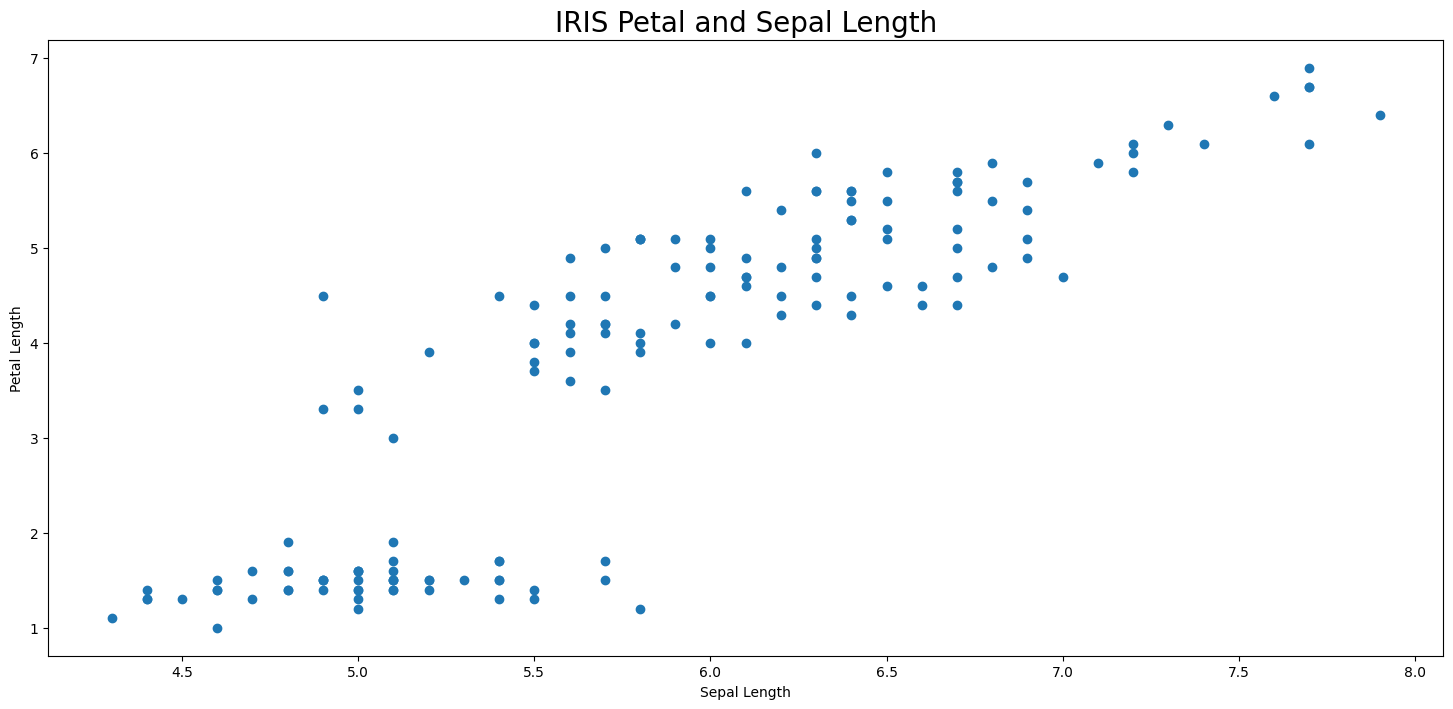

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8),dpi=100)   # Set the canvas size for visibility

plt.scatter(X.T[0],X.T[2])           # Over here we use the T ndarray method to transpose the data 
                                     # then get columns at index 0 and 2
plt.title('IRIS Petal and Sepal Length', fontsize=20) 

plt.ylabel('Petal Length') 
plt.xlabel('Sepal Length')

plt.show()

In [11]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score

linear = LinearRegression()        
linear.fit(X_train, y_train)
linear_prediction = linear.predict(X_test)

print(f'Linear Regression r2_scor: \n{r2_score(y_test, linear_prediction)}')

Linear Regression r2_scor: 
0.946724514935171


In [12]:
from sklearn.model_selection import cross_val_score

linear_score = cross_val_score(linear, X_train, y_train, cv=5)
print('Accuracy for Linear Regresion: mean: {0:.2f} 2sd: {1:.2f}'.format(linear_score.mean(), linear_score.std() * 2))
print(f'Scores: {linear_score}')

Accuracy for Linear Regresion: mean: 0.91 2sd: 0.04
Scores: [0.92011666 0.94141923 0.89550873 0.8906528  0.91237804]


In [14]:
y_train

array([0., 0., 1., 0., 0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2.,
       2., 1., 2., 1., 2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0.,
       1., 0., 1., 2., 0., 1., 2., 0., 2., 2., 1., 1., 2., 1., 0., 1., 2.,
       0., 0., 1., 1., 0., 2., 0., 0., 1., 1., 2., 1., 2., 2., 1., 0., 0.,
       2., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0., 1., 1., 2., 1., 2., 0.,
       2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1., 2., 2., 0., 1., 2., 2.,
       0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2., 2., 0., 1., 2., 0., 1.,
       2.])

In [24]:
y_test

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [16]:
from sklearn.linear_model import  GammaRegressor
from sklearn.metrics import r2_score
import numpy as np

z_train = np.where(y_train==0, 3,y_train)
z_test = np.where(y_test==0, 3,y_test)

gamma = GammaRegressor()        
gamma.fit(X_train, z_train)
gamma_prediction = gamma.predict(X_test)

print(f'Gamma GLM r2_scor: \n{r2_score(z_test, gamma_prediction)}')

Gamma GLM r2_scor: 
0.4475601297725781


In [17]:
X_train

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [18]:
X_test

array([[ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414],
       [-0.13307079,  1.67028869, -1.16259727, -1.17620281],
       [ 2.30486738, -1.02916778,  1.81915651,  1.48941263],
       [ 0.23261993, -0.35430366,  0.44296246,  0.42316645],
       [ 1.2077952 , -0.57925837,  0.61498672,  0.28988568],
       [-0.49876152,  0.77046987, -1.27728011, -1.04292204],
       [-0.2549677 , -0.35430366, -0.07311031,  0.15660491],
       [ 1.32969211,  0.09560575,  0.78701097,  1.48941263],
       [ 0.47641375, -1.9289866 ,  0.44296246,  0.42316645],
       [-0.01117388, -0.80421307,  0.09891395,  0.02332414],
       [ 0.84210448,  0.32056046,  0.78701097,  1.08957031],
       [-1.23014297, -0.12934896, -1.33462153, -1.44276436],
       [-0.37686461,  0.99542457, -1.39196294, -1.30948358],
       [-1.10824606,  0.09560575, -1.27728011, -1.44276436],
       [-0.86445224,  1.67028869, -1.27728011, -1.17620281],
       [ 0.59831066,  0.54551516,  0.5576453 ,  0.55644722],
       [ 0.84210448, -0.

In [19]:
z_train

array([3., 3., 1., 3., 3., 2., 1., 3., 3., 3., 2., 1., 1., 3., 3., 1., 2.,
       2., 1., 2., 1., 2., 1., 3., 2., 1., 3., 3., 3., 1., 2., 3., 3., 3.,
       1., 3., 1., 2., 3., 1., 2., 3., 2., 2., 1., 1., 2., 1., 3., 1., 2.,
       3., 3., 1., 1., 3., 2., 3., 3., 1., 1., 2., 1., 2., 2., 1., 3., 3.,
       2., 2., 3., 3., 3., 1., 2., 3., 2., 2., 3., 1., 1., 2., 1., 2., 3.,
       2., 1., 2., 1., 1., 1., 3., 1., 1., 3., 1., 2., 2., 3., 1., 2., 2.,
       3., 2., 3., 1., 2., 2., 1., 2., 1., 1., 2., 2., 3., 1., 2., 3., 1.,
       2.])

In [20]:
z_test

array([1., 3., 2., 1., 1., 3., 1., 2., 1., 1., 2., 3., 3., 3., 3., 1., 2.,
       1., 1., 2., 3., 2., 3., 2., 2., 2., 2., 2., 3., 3.])

In [21]:
from sklearn.linear_model import  TweedieRegressor
from sklearn.metrics import r2_score

tweedie = TweedieRegressor()        
tweedie.fit(X_train, y_train)
tweedie_prediction = tweedie.predict(X_test)

print(f'Tweedie GLM r2_scor: \n{r2_score(y_test, tweedie_prediction)}')

Tweedie GLM r2_scor: 
0.8588929203984246


In [22]:
from sklearn.linear_model import  PoissonRegressor
from sklearn.metrics import r2_score

poisson = PoissonRegressor()        
poisson.fit(X_train, y_train)
poisson_prediction = poisson.predict(X_test)

print(f'Poisson GLM r2_scor: \n{r2_score(y_test, poisson_prediction)}')

Poisson GLM r2_scor: 
0.8175681891256563
